In [ ]:
from rdflib import Graph, Namespace, RDF

def ttl_corpora_tags(filename:str) -> list[dict]:
    g = Graph()
    g.parse(filename, format="turtle")

    NIF = Namespace("http://persistence.uni-leipzig.org/nlp2rdf/ontologies/nif-core#")
    ITSRDF = Namespace("http://www.w3.org/2005/11/its/rdf#")

    data = []

    for context in g.subjects(RDF.type, NIF.Context):
        entry = {"corpus": None, "tags": []}

        for text in g.objects(context, NIF.isString):
            entry["corpus"] = str(text)

        for span in g.subjects(NIF.referenceContext, context):
            tag = {}

            for anchor in g.objects(span, NIF.anchorOf):
                tag["text"] = str(anchor)

            for begin in g.objects(span, NIF.beginIndex):
                tag["beginIndex"] = int(begin)
            for end in g.objects(span, NIF.endIndex):
                tag["endIndex"] = int(end)

            for ref in g.objects(span, ITSRDF.taIdentRef):
                tag["uri"] = str(ref)

            if tag:
                entry["tags"].append(tag)

        data.append(entry)
    return data

In [ ]:
import matplotlib.pyplot as plt
def eda_file(filename):
    print(f"EDA {filename}\n--------------------------------")
    tags = ttl_corpora_tags(filename)
    print(f"The dataset contains {len(tags)} text fragments.")
    #print(tags)
    wordlens = [len(t['corpus'].split(' ')) for t in tags]
    plt.hist(wordlens)
    plt.title("Word count in text fragments")
    plt.show()
    
    tag_ents = [len(t['tags']) for t in tags]
    plt.hist(wordlens)
    plt.title("Tagged entity count in text fragments")
    plt.show()

The dataset contains 500 text fragments.
EDA ./N3/RSS-500.ttl
--------------------------------


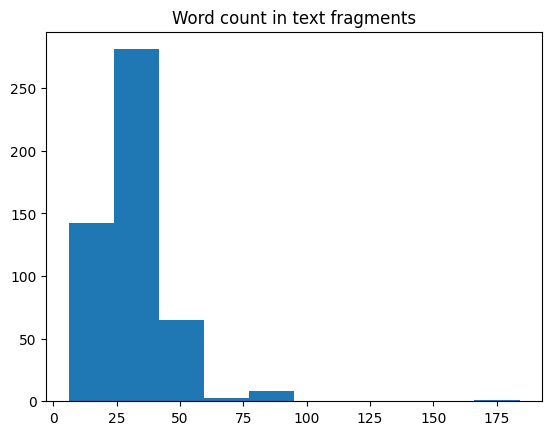

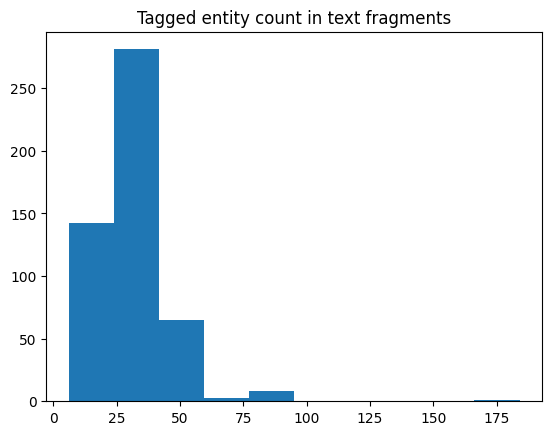

The dataset contains 128 text fragments.
EDA ./N3/Reuters-128.ttl
--------------------------------


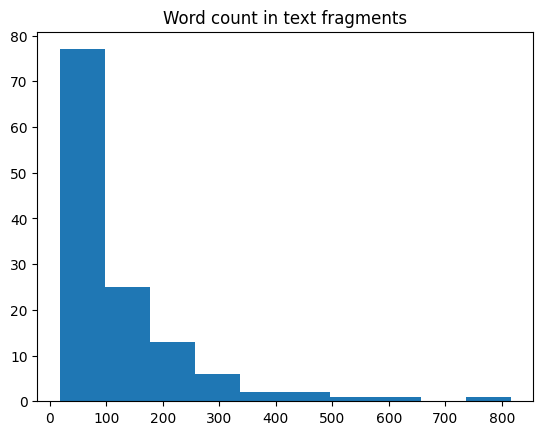

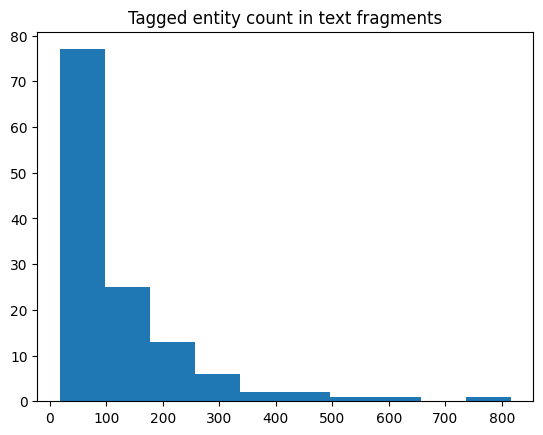

In [19]:
for file in ["./N3/RSS-500.ttl", "./N3/Reuters-128.ttl"]:
    eda_file(file)